<img style="float: right;" src="unam.png" width="120">
<img style="float: right;" src="umdi.png" width="200">
<h2>Universidad Nacional Autónoma de México</h2>
**Unidad Multidisciplinaria de Docencia e Investigación  
Facultad de Ciencias**  
Lic. en Ciencias de la Tierra  
*Computación y Análisis de Datos Geofísicos*  
Axel Cerón González  
<h3><center>Examen 1</center></h3>
<hr />

<h3>INTRODUCCIÓN</h3>  
<div style="text-align: justify"> 
<br />
La **Estadística** es una disciplina que utiliza recursos matemáticos para organizar y resumir una gran cantidad de datos obtenidos de la realizad, e inferir conclusiones respecto a ellos (Cazau, 2006). En la actualidad, el papel de la Estadística en la Ciencia e Ingeniería es crucial, ya que se puede analizar objetivamente un sistema.
<br />
<br />
<br />
**I. DISTRIBUCIÓN GUTENBERG-RICHTER**
<br />
<br />
En la **sismología estadística**, dado que el proceso físico generador de sismos y de sus respectivas réplicas, no es conocido completamente. Shcherbakov *et al*. (2005) considera que *las réplicas son el reflejo de una liberación de esfuerzos a nivel regional que se acumularon antes y durante el envento principal*. A pesar de la variabilidad estadística de las secuencias de réplicas, se observa que su comportamiento cumple las relaciones empírico-estadísticas clásicas, como la **Ley de Gutenberg-Richter** (Gutenberg y Richter, 1994). 
<br />
<br />
$$\log_{10}(N) = a - b(M - M_{1}); M \geq M_{1}$$
<br />
Donde:
<ul>
<li>$N(M)$ es el número de sismos con magnitud $\geq$ M;</li>
<li>$a$ es el número de eventos con $M \geq M_{1}$ y depende del tiempo de muestreo; y</li>
<li>$b$ es la denominada $b_{máxima}$.</li>
</ul>
<br />
Aki (1965) determino que la estimación de $b_{máxima}$ corresponde a la siguiente relación:
<br />
<br />
$$b = \frac{\log_{10}(e)}{\bar{M} - M_{1})}$$
<br />
<br />
**II. REGRESIÓN LINEAL SIMPLE**
<br />
<br />
Un modelo de **regresión lineal simple** para una variable, *Y* (**variable dependiente**), dada otra variable, *X* (**variable independiente**), es un modelo matemático que permite obtener una fórmula capaz de relacionar *Y* con *X* basada sólo en relaciones lineales del tipo:
<br />
<br />
$$Y=\beta_0 + \beta_1 X + \epsilon$$
<br />
En esta expresión:
<ul>
<li>*Y* representa a la variable dependiente;</li>
<li>*X* representa a la variable dependente;</li>
<li>$\epsilon$ representa al **error aleatorio**;</li>
<li>$\beta_0$ es la **ordenada al origen** del modelo; y</li>
<li>$\beta_1$ es la **pendiente** de la línea.</li>
</ul>

<br />
<br />
<br />
**IIa. MÍNIMOS CUADRADOS**
<br />
<br /> 
Si queremos obtener el modelo de regresión lineal *que mejor se ajuste a los datos de la muestra*, deberemos estimar los coeficientes $\beta_0$ y $\beta_1$. Se llama **recta de regresión por mínimos cuadrados** de *Y* dada *X* a la línea que tiene la *suma de errores cuadrados* más pequeña de entre todos los modelos lineales, y corresponde a las siguientes fórmulas:
<br />
<br />
$$\Delta = n\sum x^2 - ({\sum x})^2$$
<br />
$$b = \frac{({\sum x^2 \sum y - \sum x \sum xy})}{\Delta}$$
<br />
$$m = \frac{n\sum xy - \sum x \sum y}{\Delta}$$
<br />
$$ECM = \sqrt{\frac{\sum ({y-y'})^2}{n}}$$
<br />
<br />
<br />


</div>

<h3>DESAROLLO</h3>  

In [1]:
Pkg.add("LaTeXStrings")

INFO: Package LaTeXStrings is already installed
INFO: METADATA is out-of-date — you may not have the latest version of LaTeXStrings
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
using Plots
using StatsBase
using LaTeXStrings

In [3]:
Datos = readdlm("Manitude.dat");
Mag = Datos[:,1];
#Importación de los datos de Magnitud (Mw)

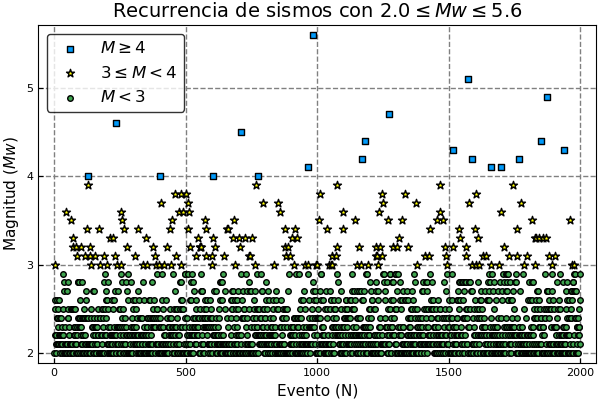

/home/axelc/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'Palatino'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [4]:
ind=[1:2000];
id = collect(1:2000);
mg=hcat(id,Mag);
ind1=Int[]
ind2=Int[]
ind3=Int[]
for k=1:length(mg[:,2])
    mgpre = mg[k,2];
    if mgpre >= 4
    push!(ind1,k)
    elseif 3 <= mgpre < 4
        push!(ind2,k)
    elseif mgpre < 3
        push!(ind3,k)
    end
end
Mag1=mg[ind1,:]
Mag2=mg[ind2,:]
Mag3=mg[ind3,:]
pyplot()
scatter(Mag1[:,1],Mag1[:,2], m=(4,:rect), label=L"$M \geq 4$")
scatter!(Mag2[:,1],Mag2[:,2], m=(6,:star5,:yellow),label=L"$3 \leq M < 4$")
scatter!(Mag3[:,1],Mag3[:,2], label=L"$M < 3$",
    grid=1, gridcolor="grey", gridlinestyle=:dash, gridalpha=1,
    legendfont=Plots.font("Palatino",12), xlabel="Evento (N)", ylabel=L"Magnitud ($Mw$)", title=L"Recurrencia de sismos con $2.0 \leq Mw \leq 5.6$",
    box=:true)

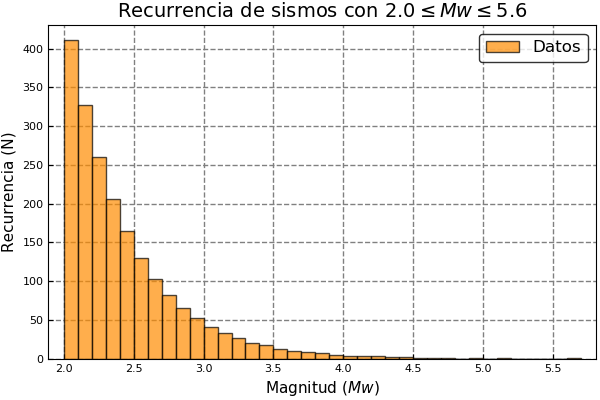

In [5]:
histogram(Mag, color="darkorange", alpha=0.7, box=:true,
    grid=1, gridcolor="grey", gridlinestyle=:dash, gridalpha=1,
    label="Datos", xlabel=L"Magnitud ($Mw$)",xticks=(2:0.5:5.6), ylabel="Recurrencia (N)", yticks=(0:50:415), ylim=(0,430),
    title=L"Recurrencia de sismos con $2.0 \leq Mw \leq 5.6$",legendfont=Plots.font("Palatino",12))

In [6]:
a=fit(Histogram, Datos[:,], 2:0.1:5.7; closed=:left)
b = a.weights; #b corresponde a los weights obtenidos de a.
h=flipdim(cumsum(flipdim(b,1)),1);
logh=log10.(h);

In [9]:
#Función para bmáxima
function bmax(x)
n = length(x)
b = (log10(e))/(mean(x)-(minimum(x)-0.05))
st = (sum(((x)-mean(x)).^2))/ (n*(n-1))
st = sqrt(st)
bs = 2.3*st*(b^2)
av = log10(n)+b*minimum(x)
return b,av,bs
end

bmax (generic function with 1 method)

In [14]:
bva, av , stb = bmax(Mag);

In [15]:
#Función para Mínimos cuadrados
function mc(x,y)
    n=length(x)
    xs=sum(x)
    ys=sum(y)
    sx=sum(x.^2)
    sxc=(sum(x)).^2
    sxy=sum(x.*y)
    
    delta=(n*sx)-sxc
    A=((sx*ys)-(xs*sxy))/delta
    B=((n*sxy)-(xs*ys))/delta
    E=sqrt(sum((y-A-B*x).^2)/n);
    return A, B, E
end

mc (generic function with 1 method)

In [16]:
bins = collect(minimum(Mag):0.1:maximum(Mag));
A, B, E = mc(bins,logh)
println("A ="," ",A, " ","B =", " ",B," ","E ="," ",E)

A = 5.221657165786303 B = -0.9745693624060766 E = 0.05876715573596436


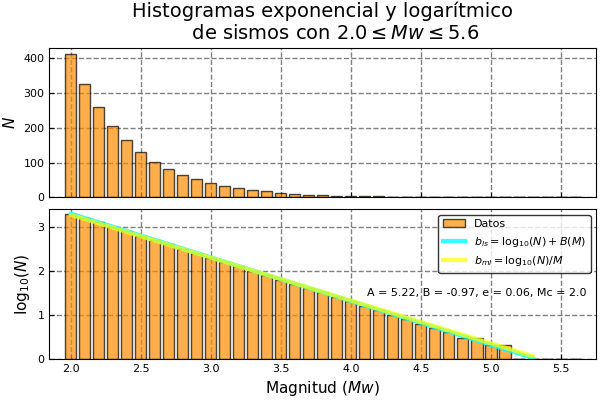

In [18]:
p1 = bar(bins,b, legend=false, xticks=(2:0.5:5.6,[]),color="darkorange", alpha=0.7,
    ylims=(0,430), ylabel=L"$N$", title=L"Histogramas exponencial y logarítmico
    de sismos con $2.0 \leq Mw \leq 5.6$")
p2 = bar(bins,logh, label="Datos", xlabel=L"Magnitud ($Mw$)",xticks=(2:0.5:5.6), color="darkorange", alpha=0.7, 
    ylims=(0,3.4), ylabel=L"$\log_{10}(N)$", annotations=(4.9,1.5,text("A = 5.22, B = -0.97, e = 0.06, Mc = 2.0", 8),:left))
b2 = bins[1:end-3]
p2 = plot!(b2,[av + (-bva)*i for i in b2],label=L"$b_{ls} = \log_{10}(N) + B(M)$",
    line=3, alpha=0.8, color="cyan")
p2 = plot!(b2,[A + B*i for i in b2],label=L"$b_{ml} = \log_{10}(N)/M$",
    line=3, alpha=0.7, color="yellow")
plot(p1,p2,layout=(2,1), box=:true,
    grid=1, gridcolor="grey", gridlinestyle=:dash, gridalpha=1, box=:true)

<h3>REFERENCIAS</h3>  
<div style="text-align: justify"> 
<br />
**Cazau, P.** (2006) *Fundamentos de Estadística*, Universidad de Buenos Aires, 80 p. 
<br />
**Gutenberg, B. y Richter, C.F.** (1994) "Earthquake magnitude intensity, energy and accelaration" en *Bulletin of the Seismological Society of America*, 24, 185-188 p.
<br />
**Shcherbakov, R., Turcotter, D. y Rundle, J.B.** (2005) "Aftershock Statistics" en *Pure and Applied Geophysics*, 162, 1051-1076 p.
<br />
**s.a.** (2018) *bmagnitude*, 8 p.

</div>